<a href="https://colab.research.google.com/github/Praxis-QR/DEMD/blob/main/Image_Classification_Train_%26_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://4.bp.blogspot.com/-gbL5nZDkpFQ/XScFYwoTEII/AAAAAAAAAGY/CcVb_HDLwvs2Brv5T4vSsUcz7O4r2Q79ACK4BGAYYCw/s1600/kk3-header00-beta.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

#Get Data

In [1]:
#get the data
!wget -q http://ufldl.stanford.edu/housenumbers/train_32x32.mat

In [ ]:
#!wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat
# this data causes problems

In [2]:
#Feature Processing
import sklearn
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load our dataset
train_data = scipy.io.loadmat('train_32x32.mat')
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']

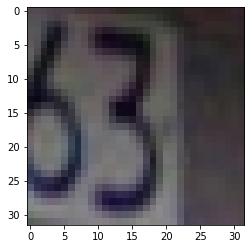

In [4]:
# view an image (e.g. 25) and print its corresponding label
img_index = 25
X[:,:,:,img_index]
plt.imshow(X[:,:,:,img_index])
#plt.show()
#print(y[img_index])

In [5]:
from sklearn.utils import shuffle
X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
y = y.reshape(y.shape[0],)
X, y = shuffle(X, y, random_state=42)

#ML Train

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf_01 = RandomForestClassifier()
print(clf_01)

RandomForestClassifier()


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
%%time
#Model is built here ... takes some time nearly 4+ mins
clf_01.fit(X_train, y_train)
#instead we download from https://drive.google.com/file/d/16l-3moLo4S-f87C6Nw9JxPPuCuXvJrso/view?usp=sharing

CPU times: user 4min 27s, sys: 457 ms, total: 4min 28s
Wall time: 4min 27s


RandomForestClassifier()

##Save

In [9]:
import joblib
joblib.dump(clf_01, 'imClass-model-270722A.pkl')

['imClass-model-270722A.pkl']

In [10]:
from google.colab import drive
drive.mount('/content/drive')
#!ls /content/drive/MyDrive/Praxis/'Course - DevOps'/DevOps21/data/
!cp imClass-model-270722A.pkl /content/drive/MyDrive/Praxis/'Course - DevOps'/DevOps21/data/

Mounted at /content/drive


#ML Test

In [11]:
clf_02 = joblib.load('imClass-model-270722A.pkl')

In [12]:
from sklearn.metrics import accuracy_score
preds = clf_02.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.7036582036582036


#Test Individual Files 
https://github.com/elliebirbeck/model-deployment-flask/tree/master/test-imgs

In [ ]:
import numpy as np
#from scipy import misc
import imageio

In [ ]:
!wget https://github.com/elliebirbeck/model-deployment-flask/raw/master/test-imgs/test-5.png
!wget https://github.com/elliebirbeck/model-deployment-flask/raw/master/test-imgs/test-7.png

--2021-08-24 03:22:02--  https://github.com/elliebirbeck/model-deployment-flask/raw/master/test-imgs/test-5.png
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/elliebirbeck/model-deployment-flask/master/test-imgs/test-5.png [following]
--2021-08-24 03:22:03--  https://raw.githubusercontent.com/elliebirbeck/model-deployment-flask/master/test-imgs/test-5.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1948 (1.9K) [image/png]
Saving to: ‘test-5.png’

test-5.png          100%[===================>]   1.90K  --.-KB/s    in 0s      

2021-08-24 03:22:03 (23.8 MB/s) - ‘test-5.png’ saved [1948/1948]


In [ ]:

img0 = imageio.imread("test-7.png")
img1 = img0[:,:,:3]
img2 = img1.reshape(1, -1)

In [ ]:
img2

Array([[227, 233, 236, ..., 207, 216, 221]], dtype=uint8)

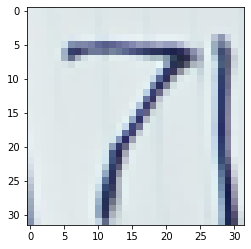

In [ ]:
#plt.imshow(X[:,:,:,img_index])
plt.imshow(img0)

In [ ]:
prediction = clf_02.predict(img2)

In [ ]:
label = str(np.squeeze(prediction))

In [ ]:
label

'2'

In [ ]:
print(str(np.squeeze(loadedModel.predict(img2))))

2


In [ ]:
#now to make it completely unreadable
print(str(np.squeeze(loadedModel.predict(img0[:,:,:3].reshape(1, -1)))))

2


In [ ]:
print(str(np.squeeze(loadedModel.predict(imageio.imread("test-7.png")[:,:,:3].reshape(1, -1)))))

2


In [ ]:
print(str(np.squeeze(loadedModel.predict(imageio.imread("test-5.png")[:,:,:3].reshape(1, -1)))))

5


#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)